# Loading the Dataset #

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/yash9939/Crop_Recomendation_System/refs/heads/main/Dataset/Crop%20recommendation%20dataset.csv")

df.head()

,CROPS,TYPE_OF_CROP,SOIL,SEASON,SOWN,HARVESTED,WATER_SOURCE,SOIL_PH,SOIL_PH_HIGH,CROPDURATION,...,WATERREQUIRED,WATERREQUIRED_MAX,RELATIVE_HUMIDITY,RELATIVE_HUMIDITY_MAX,N,N_MAX,P,P_MAX,K,K_MAX
0,rice,cereals,Alluvial soil,kharif,Jun,Sep,irrigated,7.6,8.0,116.9,...,2462.3,2500,73.8,80,82.4,100,40.7,60,42.2,60
1,rice,cereals,Loamy soil,kharif,Jul,Oct,rainfed,6.2,8.0,117.9,...,1237.5,2500,60.9,80,90.5,100,51.3,60,46.2,60
2,rice,cereals,Clay soil,kharif,Jun,Sep,irrigated,6.7,8.0,117.7,...,1075.1,2500,67.5,80,86.2,100,50.7,60,44.4,60
3,rice,cereals,Alluvial soil,kharif,Jul,Oct,rainfed,6.1,8.0,149.8,...,1549.9,2500,73.6,80,91.3,100,51.3,60,44.5,60
4,rice,cereals,Loamy soil,kharif,Jun,Sep,irrigated,8.0,8.0,131.7,...,1306.4,2500,60.3,80,81.3,100,48.6,60,51.0,60


In [3]:
df = df.sample(frac=1)


In [4]:
df.head()

,CROPS,TYPE_OF_CROP,SOIL,SEASON,SOWN,HARVESTED,WATER_SOURCE,SOIL_PH,SOIL_PH_HIGH,CROPDURATION,...,WATERREQUIRED,WATERREQUIRED_MAX,RELATIVE_HUMIDITY,RELATIVE_HUMIDITY_MAX,N,N_MAX,P,P_MAX,K,K_MAX
16757,redgram,pulses,loamy soil,rabi,Nov,May,rainfed,6.8,7.0,127.7,...,788.4,1400,77.0,81,58.8,60,39.1,40,20.4,40
8444,thinai,millets,Alluvial soil,kharif,Jun,Sep,irrigated,6.2,7.0,85.7,...,778.9,900,16.2,20,32.5,40,20.0,30,27.0,30
28947,chillies,vegetables,Laterite soil,Zaid,May,May,rainfed,6.6,6.8,120.0,...,500.0,500,76.1,85,126.2,150,42.1,80,92.2,120
50458,beetroot,Root&tuber,friable soil,rabi,Dec,Jun,irrigated,6.9,7.0,60.0,...,1000.0,1000,99.9,100,92.0,100,45.6,60,40.5,60
10503,kudiraivali,millets,Loamy soil,kharif,Jul,Oct,rainfed,5.9,7.0,90.2,...,890.9,900,17.8,20,54.0,60,31.3,40,36.9,40


In [5]:
print(f"Number of Rows: {df.shape[0]}\nNumber of Columns: {df.shape[1]}")

Number of Rows: 57000
Number of Columns: 23


In [6]:
def details(data):
    features = []
    count = []
    duplicates = []
    missing  = []
    modes = []
    duplicate_percentage = []
    missing_percentage = []
    dtype = []
    for i in data.columns:
        features.append(i)
        count.append(data[i].count())
        duplicates.append(data.duplicated(subset=[i]).sum())
        missing.append(data[i].isnull().sum())
        modes.append(data[i].mode()[0])
        duplicate_percentage.append(f"{(data.duplicated(subset=[i]).sum())/data.shape[0]*100:.2f} %")
        missing_percentage.append(f"{(data[i].isnull().sum())/data.shape[0]*100:.2f} %")
        dtype.append(data[i].dtype)

    dataFrame = pd.DataFrame({'Features/Columns' : features,
                              'Count' : count,
                              'Missing' : missing,
                              'Duplicates' : duplicates,
                              'Mode' : modes,
                              'Duplicate Percentage' : duplicate_percentage,
                              'Missing Percentage' : missing_percentage,
                              'Data Type' : dtype})
    return dataFrame

In [7]:
details(df)

,Features/Columns,Count,Missing,Duplicates,Mode,Duplicate Percentage,Missing Percentage,Data Type
0,CROPS,57000,0,56943,Cabbage,99.90 %,0.00 %,object
1,TYPE_OF_CROP,57000,0,56990,vegetables,99.98 %,0.00 %,object
2,SOIL,57000,0,56966,sandy Loamy soil,99.94 %,0.00 %,object
3,SEASON,57000,0,56997,Zaid,99.99 %,0.00 %,object
4,SOWN,57000,0,56992,Jul,99.99 %,0.00 %,object
5,HARVESTED,57000,0,56993,Apr,99.99 %,0.00 %,object
6,WATER_SOURCE,57000,0,56998,irrigated,100.00 %,0.00 %,object
7,SOIL_PH,57000,0,56959,6.6,99.93 %,0.00 %,float64
8,SOIL_PH_HIGH,57000,0,56989,7.0,99.98 %,0.00 %,float64
9,CROPDURATION,57000,0,54731,120.0,96.02 %,0.00 %,float64


In [8]:
df.describe()

,SOIL_PH,SOIL_PH_HIGH,CROPDURATION,CROPDURATION_MAX,TEMP,MAX_TEMP,WATERREQUIRED,WATERREQUIRED_MAX,RELATIVE_HUMIDITY,RELATIVE_HUMIDITY_MAX,N,N_MAX,P,P_MAX,K,K_MAX
count,57000.000000,57000.000000,57000.000000,57000.000000,57000.000000,57000.000000,57000.000000,57000.000000,57000.000000,57000.000000,57000.000000,57000.000000,57000.000000,57000.000000,57000.000000,57000.000000
mean,6.624367,7.245614,109.347488,117.736842,24.757740,30.385965,887.262882,1038.596491,71.197588,76.421053,81.284277,98.947368,48.197891,60.526316,56.605086,69.122807
std,0.649972,0.609310,52.931444,54.934103,5.862506,6.354373,356.326523,438.103562,23.158554,23.860877,33.786202,37.542549,17.160902,19.414494,27.438288,30.681465
min,5.000000,6.000000,21.000000,21.000000,5.000000,18.000000,330.000000,350.000000,15.000000,18.000000,20.000000,40.000000,20.000000,30.000000,20.000000,30.000000
25%,6.200000,6.800000,75.900000,90.000000,21.100000,27.000000,604.600000,750.000000,64.400000,70.000000,56.600000,80.000000,34.975000,40.000000,34.900000,40.000000
50%,6.600000,7.000000,99.900000,105.000000,24.800000,30.000000,929.500000,1000.000000,78.200000,85.000000,80.500000,100.000000,47.700000,60.000000,50.500000,60.000000
75%,7.000000,7.500000,120.500000,140.000000,28.000000,35.000000,1070.100000,1200.000000,85.300000,90.000000,100.800000,120.000000,58.000000,80.000000,75.400000,100.000000
max,9.000000,9.000000,330.000000,330.000000,47.000000,47.000000,2499.800000,2500.000000,100.000000,100.000000,199.900000,200.000000,100.000000,100.000000,149.900000,150.000000


In [9]:
for col in df.select_dtypes(include='object').columns:
  print(f"{col} : {df[col].nunique()}\n{df[col].unique()}\n")

CROPS : 57
['redgram' 'thinai' 'chillies' 'beetroot' 'kudiraivali' 'snake gourd'
 'tapoica' 'small onion' 'maize' 'bottle gourd' 'ribbed gourd' 'horsegram'
 'cowpea' 'cotton' 'onion' 'sweet potato' 'sugarbeet' 'sunflower'
 'cluster bean' 'sorghum' 'chowchow' 'vegetable cowpea' 'brinjal'
 'muskmelon' 'french bean' 'ash gourd' 'sugarcane' 'greengram'
 'Pearl millet' 'Cabbage' 'varagu' 'elephant foot yam' 'tinda' 'castor'
 'bitter gourd' 'watermelon' 'gingely' 'ragi' 'annual moringa' 'cucumber'
 'radish' 'jute' 'rice' 'bhendi' 'carrot' 'capsicum' 'tomato' 'panivaragu'
 'bengalgram' 'samai' 'blackgram' 'groundnut' 'pumpkin' 'soyabean'
 'cauliflower' 'wheat' 'peas']

TYPE_OF_CROP : 10
['pulses' 'millets' 'vegetables' 'Root&tuber' 'bulbvegetables'
 'fibre crop' 'sugar crops' 'oil seeds' 'colecrops' 'cereals']

SOIL : 34
['loamy\xa0soil' 'Alluvial soil' 'Laterite soil' 'friable soil'
 'Loamy soil' 'red lateritic Loamy soil' 'sandy Loamy soil' 'Red soil'
 'heavy soil\xa0' 'well-drained soil' '

In [10]:
def strip_data(data):
  for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].str.strip()
  return data

In [11]:
df = strip_data(df)

In [12]:
mapping = {
    "colecrops":"cole crops",
    "Root&tuber":"Tuberous root",
    "bulbvegetables":"bulb vegetables"
}

df.TYPE_OF_CROP = df.TYPE_OF_CROP.replace(mapping)
df.TYPE_OF_CROP.unique()

array(['pulses', 'millets', 'vegetables', 'Tuberous root',
       'bulb vegetables', 'fibre crop', 'sugar crops', 'oil seeds',
       'cole crops', 'cereals'], dtype=object)

In [13]:
def correct_soil(s):
  if "\xa0" in s:
    s = s.replace("\xa0","")
  return s

In [14]:
df.SOIL = df.SOIL.apply(lambda x: correct_soil(x))
df.SOIL.unique()

array(['loamysoil', 'Alluvial soil', 'Laterite soil', 'friable soil',
       'Loamy soil', 'red lateritic Loamy soil', 'sandy Loamy soil',
       'Red soil', 'heavy soil', 'well-drained soil', 'clay Loamy soil',
       'silty Loamy soil', 'well-drained loamysoil', 'black cotton soil',
       'sandy loamysoil', 'Clay soil', 'rich red Loamy soil',
       'Sandy soil', 'red Loamy soil', 'salty clay Loamy soil',
       'well-grained deep loamy moist soil', 'light soi',
       'medium Black Soil', 'deep soil', 'cottonsoil',
       'sandy clay Loamy soil', 'Sandysoil', 'heavy Black Soil',
       'brown Loamy soil', 'shallow Black Soil', 'Black Soil',
       'light Loamy soil'], dtype=object)

In [15]:
mapping = {
    "Sandysoil":"Sandy Soil",
    "loamysoil":"loamy soil",
    "light soi":"light soil",
    "well-drained loamysoil":"well-drained loamy soil",
    "cottonsoil":"cotton soil",
    "sandy loamysoil":"sandy loamy soil"
}

df.SOIL = df.SOIL.replace(mapping)
df.SOIL.unique()

array(['loamy soil', 'Alluvial soil', 'Laterite soil', 'friable soil',
       'Loamy soil', 'red lateritic Loamy soil', 'sandy Loamy soil',
       'Red soil', 'heavy soil', 'well-drained soil', 'clay Loamy soil',
       'silty Loamy soil', 'well-drained loamy soil', 'black cotton soil',
       'sandy loamy soil', 'Clay soil', 'rich red Loamy soil',
       'Sandy soil', 'red Loamy soil', 'salty clay Loamy soil',
       'well-grained deep loamy moist soil', 'light soil',
       'medium Black Soil', 'deep soil', 'cotton soil',
       'sandy clay Loamy soil', 'Sandy Soil', 'heavy Black Soil',
       'brown Loamy soil', 'shallow Black Soil', 'Black Soil',
       'light Loamy soil'], dtype=object)

In [16]:
def capitalize(data):
  for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].str.capitalize()
  return data

df = capitalize(df)

for col in df.select_dtypes(include='object').columns:
  print(f"{col} : {df[col].nunique()}\n{df[col].unique()}\n")

CROPS : 57
['Redgram' 'Thinai' 'Chillies' 'Beetroot' 'Kudiraivali' 'Snake gourd'
 'Tapoica' 'Small onion' 'Maize' 'Bottle gourd' 'Ribbed gourd' 'Horsegram'
 'Cowpea' 'Cotton' 'Onion' 'Sweet potato' 'Sugarbeet' 'Sunflower'
 'Cluster bean' 'Sorghum' 'Chowchow' 'Vegetable cowpea' 'Brinjal'
 'Muskmelon' 'French bean' 'Ash gourd' 'Sugarcane' 'Greengram'
 'Pearl millet' 'Cabbage' 'Varagu' 'Elephant foot yam' 'Tinda' 'Castor'
 'Bitter gourd' 'Watermelon' 'Gingely' 'Ragi' 'Annual moringa' 'Cucumber'
 'Radish' 'Jute' 'Rice' 'Bhendi' 'Carrot' 'Capsicum' 'Tomato' 'Panivaragu'
 'Bengalgram' 'Samai' 'Blackgram' 'Groundnut' 'Pumpkin' 'Soyabean'
 'Cauliflower' 'Wheat' 'Peas']

TYPE_OF_CROP : 10
['Pulses' 'Millets' 'Vegetables' 'Tuberous root' 'Bulb vegetables'
 'Fibre crop' 'Sugar crops' 'Oil seeds' 'Cole crops' 'Cereals']

SOIL : 29
['Loamy soil' 'Alluvial soil' 'Laterite soil' 'Friable soil'
 'Red lateritic loamy soil' 'Sandy loamy soil' 'Red soil' 'Heavy soil'
 'Well-drained soil' 'Clay loamy soil

# EDA

/tmp/ipython-input-192512127.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df.SOIL, order = df.SOIL.value_counts().index, palette='Set2', alpha=0.8)


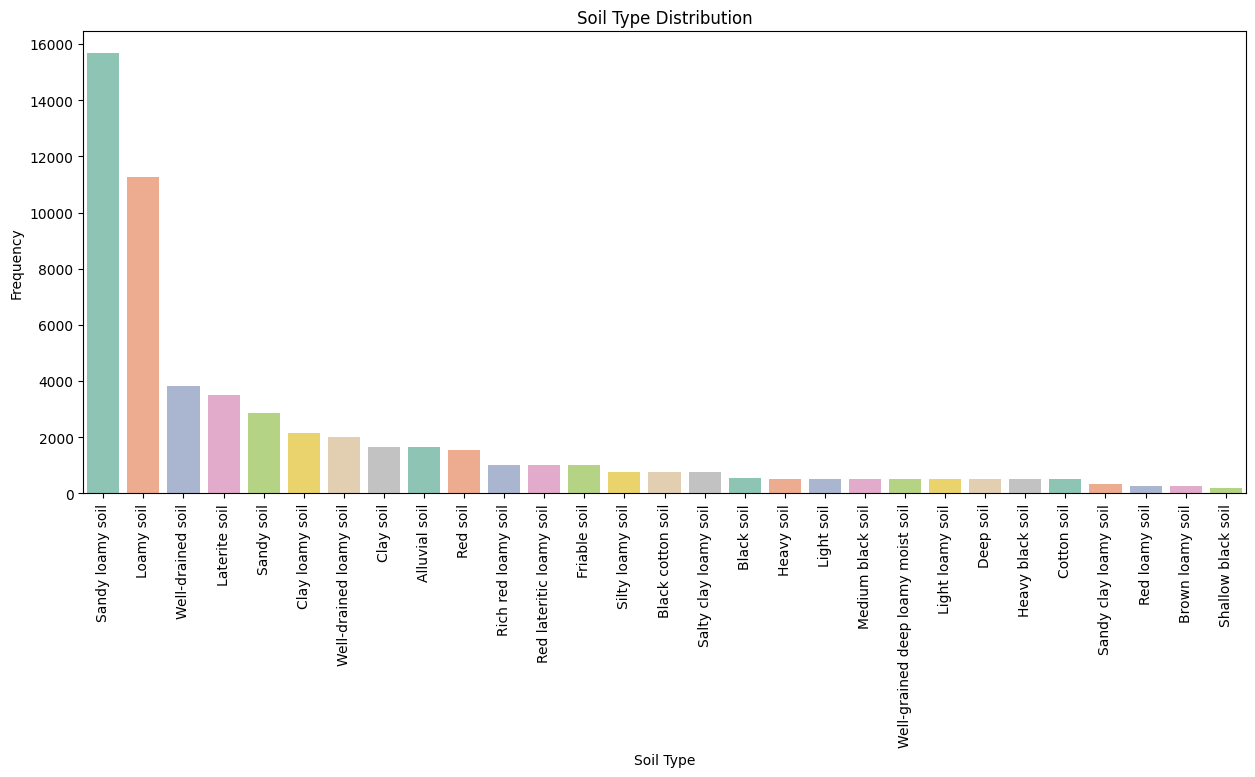

In [17]:
plt.figure(figsize=(15,6))
sns.countplot(x = df.SOIL, order = df.SOIL.value_counts().index, palette='Set2', alpha=0.8)
plt.xticks(rotation=90)
plt.title("Soil Type Distribution")
plt.xlabel("Soil Type")
plt.ylabel("Frequency")
plt.show()

/tmp/ipython-input-1568765022.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_crop_duration.index, y=avg_crop_duration.values, palette='pastel')


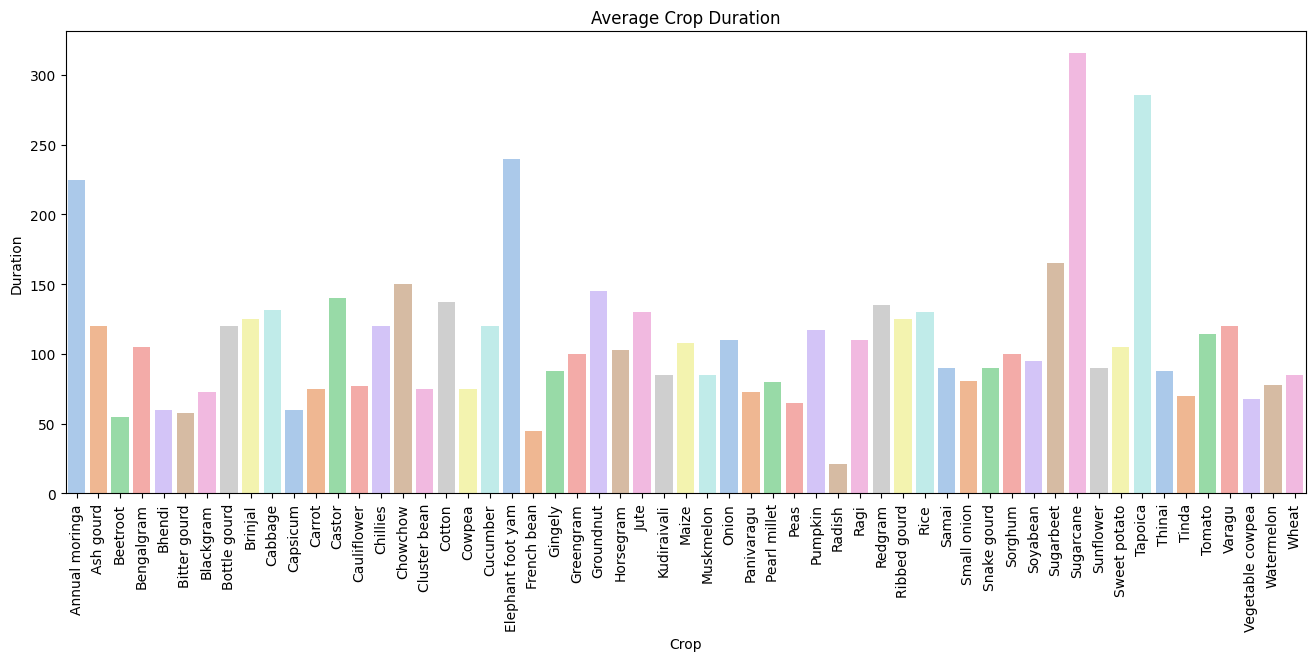

In [18]:
avg_crop_duration = df.groupby('CROPS')['CROPDURATION'].mean()

plt.figure(figsize=(16,6))
sns.barplot(x=avg_crop_duration.index, y=avg_crop_duration.values, palette='pastel')
plt.xticks(rotation=90)
plt.title("Average Crop Duration")
plt.xlabel("Crop")
plt.ylabel("Duration")
plt.show()

/tmp/ipython-input-84759454.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_temp.index, y=avg_temp.values, palette='colorblind')


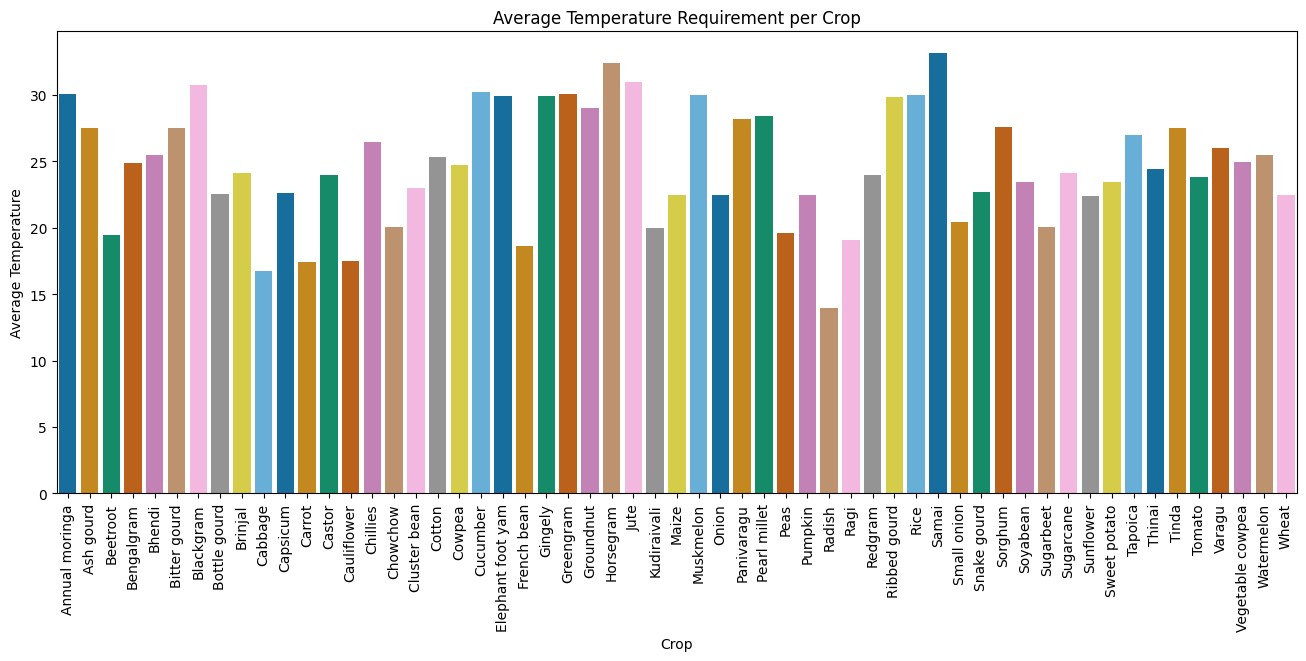

In [19]:
avg_temp = df.groupby('CROPS')['TEMP'].mean()

plt.figure(figsize=(16,6))
sns.barplot(x=avg_temp.index, y=avg_temp.values, palette='colorblind')
plt.xticks(rotation=90)
plt.title("Average Temperature Requirement per Crop")
plt.ylabel("Average Temperature")
plt.xlabel("Crop")
plt.show()

/tmp/ipython-input-2849556753.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_N.index, y=avg_N.values, palette='tab10')


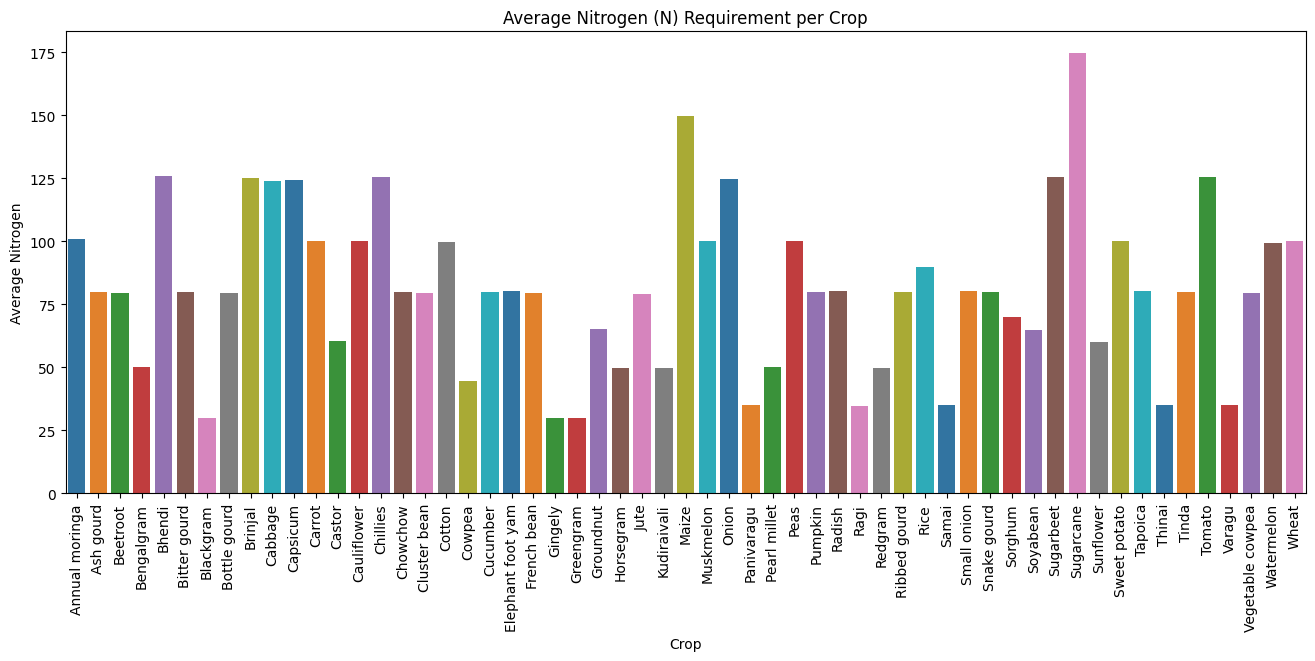

In [20]:
avg_N = df.groupby('CROPS')['N'].mean()

plt.figure(figsize=(16,6))
sns.barplot(x=avg_N.index, y=avg_N.values, palette='tab10')
plt.xticks(rotation=90)
plt.title("Average Nitrogen (N) Requirement per Crop")
plt.ylabel("Average Nitrogen")
plt.xlabel("Crop")
plt.show()

/tmp/ipython-input-536857029.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df.WATER_SOURCE, order=df.WATER_SOURCE.value_counts().index, palette='Set1')


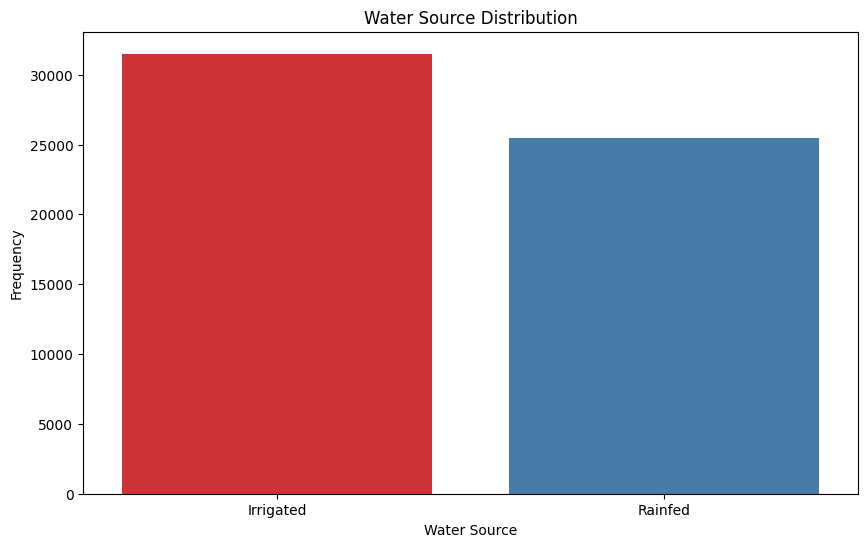

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x=df.WATER_SOURCE, order=df.WATER_SOURCE.value_counts().index, palette='Set1')
plt.title("Water Source Distribution")
plt.xlabel("Water Source")
plt.ylabel("Frequency")
plt.show()

/tmp/ipython-input-1795704600.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_K.index, y=avg_K.values, palette='muted')


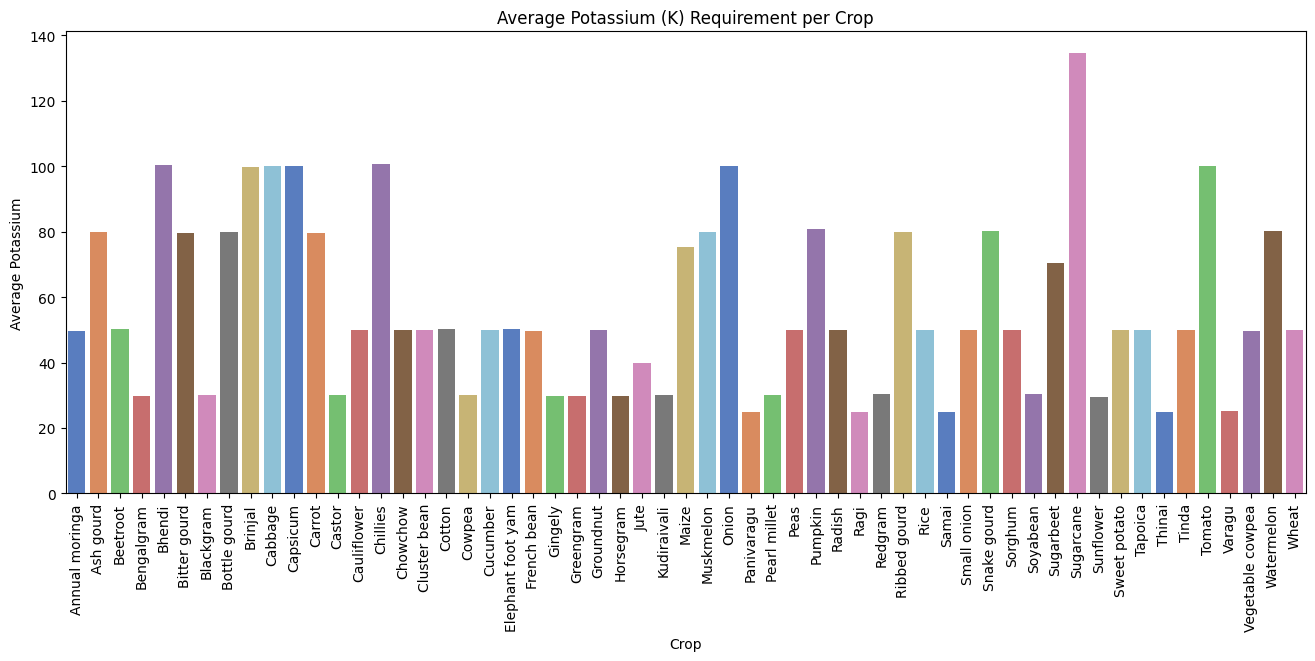

In [22]:
avg_K = df.groupby('CROPS')['K'].mean()

plt.figure(figsize=(16,6))
sns.barplot(x=avg_K.index, y=avg_K.values, palette='muted')
plt.xticks(rotation=90)
plt.title("Average Potassium (K) Requirement per Crop")
plt.ylabel("Average Potassium")
plt.xlabel("Crop")
plt.show()

/tmp/ipython-input-1539979030.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_P.index, y=avg_P.values, palette='deep')


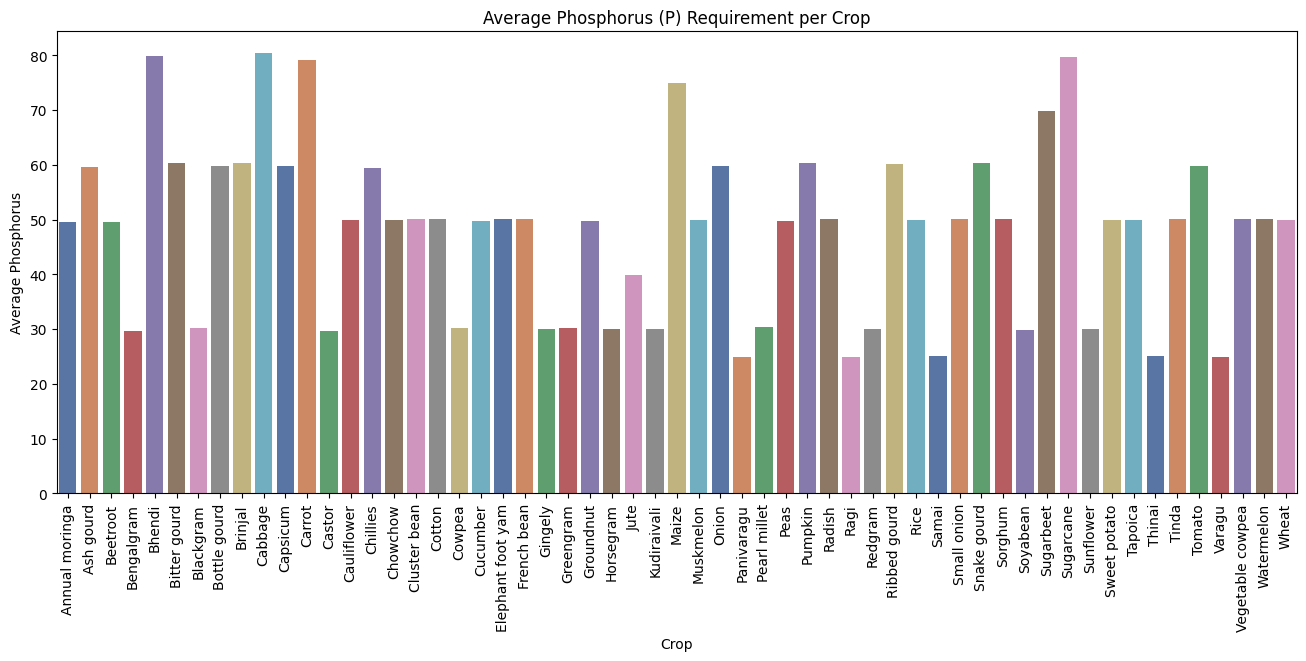

In [23]:
avg_P = df.groupby('CROPS')['P'].mean()

plt.figure(figsize=(16,6))
sns.barplot(x=avg_P.index, y=avg_P.values, palette='deep')
plt.xticks(rotation=90)
plt.title("Average Phosphorus (P) Requirement per Crop")
plt.ylabel("Average Phosphorus")
plt.xlabel("Crop")
plt.show()

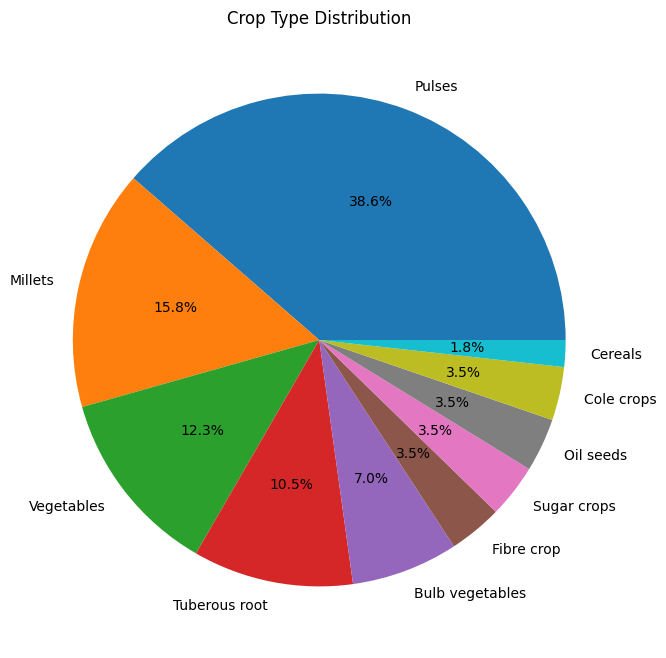

In [24]:
plt.figure(figsize=(10,8))
plt.pie(df.TYPE_OF_CROP.value_counts(), labels=df.TYPE_OF_CROP.unique(), autopct='%1.1f%%', startangle=0)
plt.title("Crop Type Distribution")
plt.show()

/tmp/ipython-input-2079759947.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_water.index, y=avg_water.values, palette='bright')


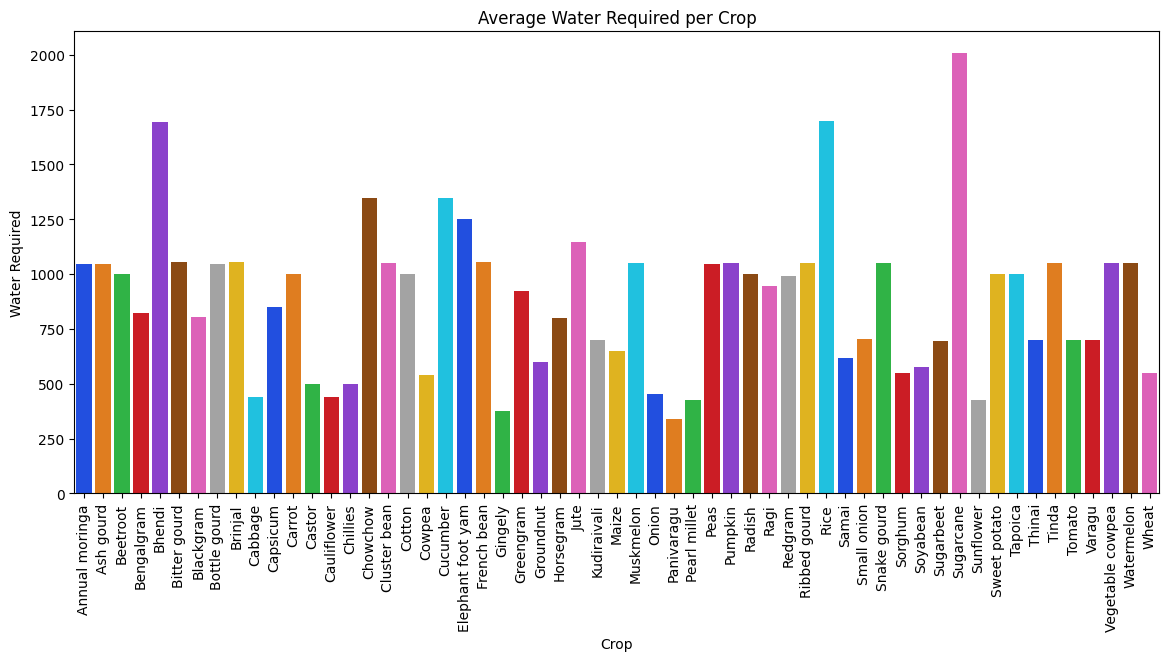

In [25]:
avg_water = df.groupby('CROPS')['WATERREQUIRED'].mean()

plt.figure(figsize=(14,6))
sns.barplot(x=avg_water.index, y=avg_water.values, palette='bright')
plt.xticks(rotation=90)
plt.title("Average Water Required per Crop")
plt.ylabel("Water Required")
plt.xlabel("Crop")
plt.show()

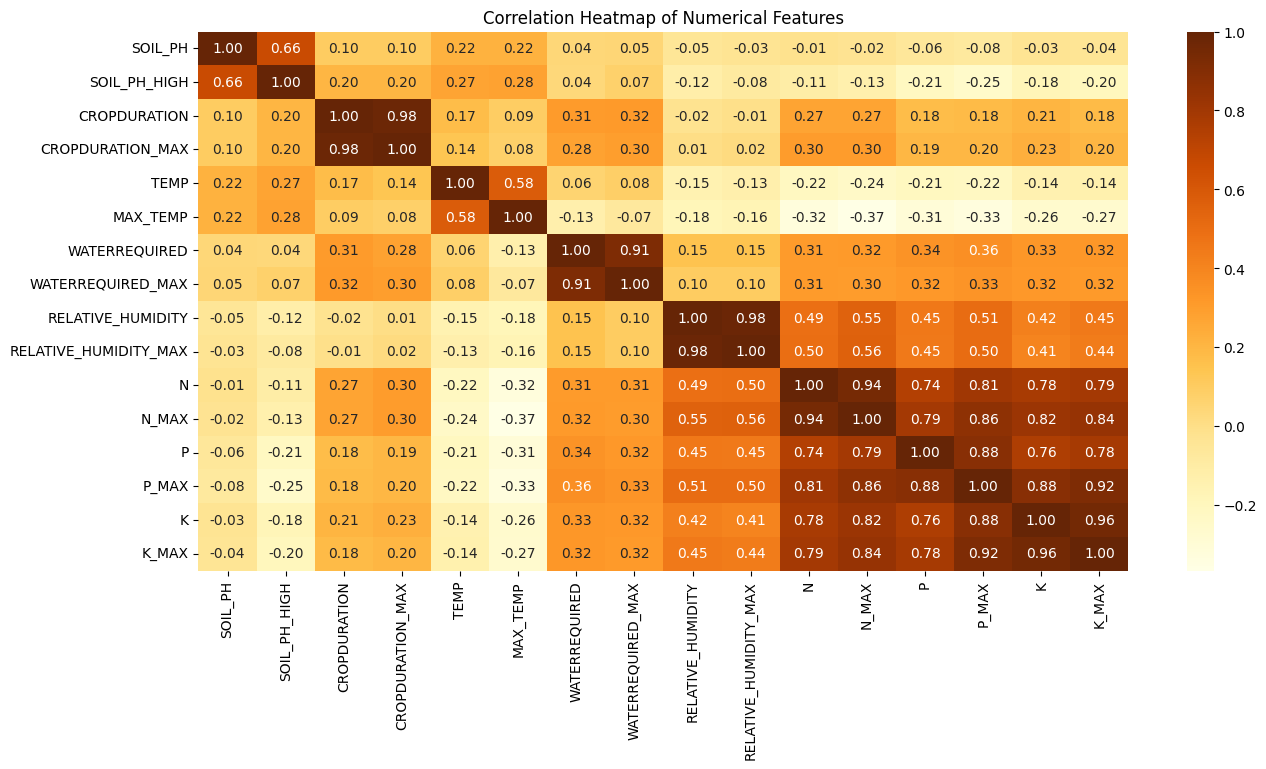

In [27]:
num_cols = []
for col in df.select_dtypes(include=['int64','float64']).columns:
  num_cols.append(col)

plt.figure(figsize=(15,7))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap='YlOrBr')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()